In [64]:
from matplotlib import pyplot as plt 
import numpy as np
from numpy.typing import ArrayLike
import utils
from utils import debug, debugs, debugt
from typing import Tuple

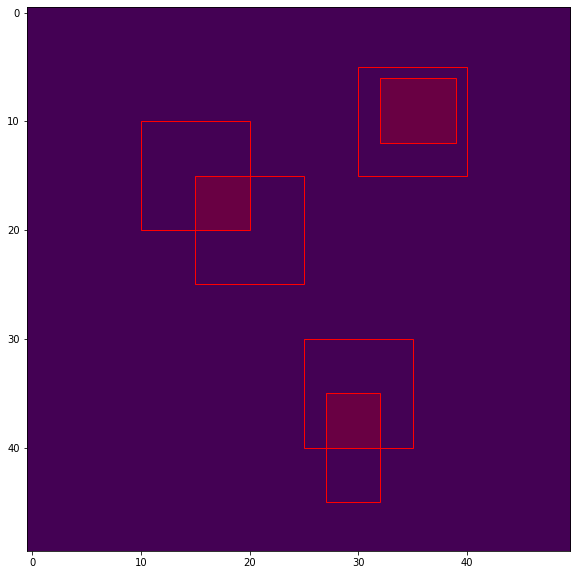

In [211]:
def plot_box_intersection(boxes1: ArrayLike, boxes2: ArrayLike):    
    boxes1 = np.array(boxes1)
    boxes2 = np.array(boxes2)
        
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(np.zeros((50,50)))
    for x1, y1, x2, y2 in (*boxes1, *boxes2):
        ax.add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='red'))
        
    lt = np.max([boxes1[:,:2], boxes2[:,:2]], 0)
    rb = np.min([boxes1[:,2:], boxes2[:,2:]], 0)
    
    wh = (rb - lt).clip(0)
    
    boxes = np.concatenate((lt, rb), axis=1)
    for (x, y), (w, h) in zip(boxes[:,:2], wh):
        ax.add_patch(plt.Rectangle((x, y), w, h, facecolor='red', alpha=0.2))

    
plot_box_intersection(
    [[10,10,20,20],
     [30, 5,40,15],
     [25,30,35,40]],
    
    [[15,15,25,25],
     [32, 6,39,12],
     [27,35,32,45]]
)